## 📚 **Assignment 1 : Bresenham's Line Drawing Algorithm**

👉 **Definition** : Bresenham's Line Drawing Algorithm is an efficient method used in computer graphics to draw a line between two points on a grid system. The algorithm works by incrementally plotting points between the start and end coordinates of the line while minimizing the error at each step.

![](./Bresenham's%20Line.png)

In [1]:
import matplotlib.pyplot as plot
import numpy as np

### **Function for plotting the pixels into Grid (Drawing a Line)**

In [2]:
def draw_plot(points, start, end):
    
    plot.figure(figsize=(10, 10))
    # Extract x and y coordinates
    x_values = [coord[0] for coord in points]
    y_values = [coord[1] for coord in points]
    
    # Determine grid size
    grid_size_x = max(y_values) + 1
    grid_size_y = max(x_values) + 1

    # Initialize grid
    grid = np.zeros((grid_size_x, grid_size_y))

    # Mark points on grid
    for x, y in zip(y_values, x_values):
        grid[x, y] = 1

    # Display grid
    plot.imshow(grid, cmap="Greys", origin='lower', extent=[0, grid_size_y, 0, grid_size_x], alpha=.4)

    # Add labels and title
    plot.xlabel('X - Axis')
    plot.ylabel('Y - Axis')
    plot.title('Bresenhams Line Drawing Visualization')

    # Add grid lines
    plot.grid(True, color='black', linewidth=1.5, linestyle='-')

    # Plot points
    plot.plot(x_values, y_values, marker='o', color='red',linewidth=2)

    # Plot line between start and end
    x_line = [start[0], end[0]]
    y_line = [start[1], end[1]]
    plot.plot(x_line, y_line, marker='o', color='#11235A',linewidth=2)
    # Set x and y axis limits
    
    # Show plot
    plot.show()

### **Bresenham's Line Drawing Algorithm for** `0 < m < 1`

![](./Bresenham's%20Line.png)

Converting the line drawing algorithm into a function that takes in the start and end coordinates of the line and returns the coordinates of the pixels that need to be plotted to draw the line.

In [3]:
def bresenhams_line(x_start, y_start, x_end, y_end):
   # Initialize lists for points
    points = []
    
    # Assign initial values
    x, y = x_start, y_start
    
    # Finding Delta X , Y values
    delta_y = y_end - y_start  # Δy = y6 - y1
    delta_x = x_end - x_start  # Δx = x6 - x1
    
    # Creating Base Decision Parameter
    decisionParameter = 2 * delta_y - delta_x  # d1 = 2Δy - Δx

    # Generate points for the line
    while x <= x_end:
        points.append((x, y))
        x += 1
        if decisionParameter < 0: #  if(di < 0) 
            decisionParameter = decisionParameter + 2 * delta_y # d(i+1) = di + 2Δy
        else:
            decisionParameter = decisionParameter + 2 * delta_y - 2 * delta_x #d(i+1) = di + 2Δy - 2Δx
            y += 1
    
    # Define start and end points
    start_point = (x_start, y_start)
    end_point = (x_end, y_end)
   
    
    # Call the plot function
    draw_plot(points, start_point, end_point)
    

### **Bresenham's Line Drawing : Input : Start Point (1,1) && End Point (8,4)**

Slope :  0.42857142857142855


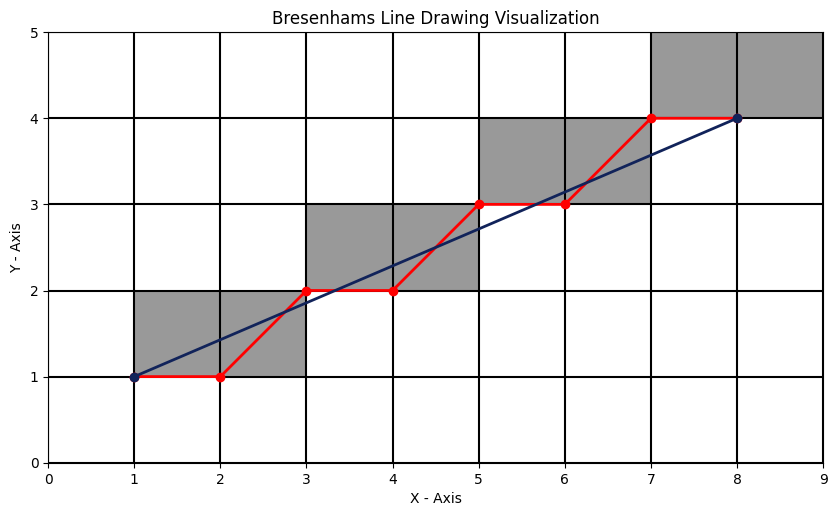

In [4]:
### Here Slope :
m = (4 - 1) / (8 - 1);
print("Slope : ", m) ;

bresenhams_line(1, 1, 8, 4)

### **Bresenham's Line Drawing : Input : Start Point (1,1) && End Point (4,8)**

Slope :  2.3333333333333335


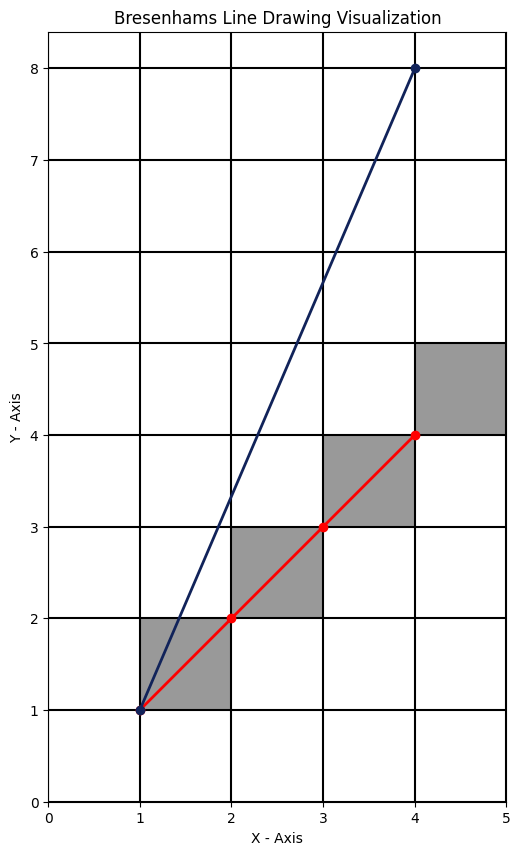

In [5]:
### Here Slope :
m = (8 - 1) / (4 - 1);
print("Slope : ", m) ;

bresenhams_line(1, 1, 4, 8)

### Here Line Drawing : Input : Start Point (1,1) && End Point (4,8) is generating `a wrong line`

Slope = 2.33333 : where `m > 1`

**Bresenham's Line Algorithm Function was for `0 < m < 1`** ; 

That's why we need to convert the line drawing algorithm for `m > 1`

<hr>

### **(NEW) Bresenham's Line Drawing Algorithm for** `m > 1`
Updating Code For `slope > 1`:
- Calculate the differences in x and y coordinates `(delta_x and delta_y)`.

- Set a flag `swapped` to False. This flag will be used to track if the roles of x and y were swapped.

- Check if the absolute value of the slope (delta_y / delta_x) is greater than 1. 

- If it is `abs(delta_y) > abs(delta_x)`, swap the roles of x and y, swap the start and end coordinates, `swap delta_x and delta_y`, and set swapped to True.

- Calculate the initial decision parameter based on delta_x and delta_y like previous function

- After calculating the decision parameters : if`swapped is True`, `swap the x and y` values in the points list and the start and end coordinates.

- Call the draw_plot function with the points, start point, and end point.


![](new%20breshmen%20line.png)


In [6]:
def bresenhams_line_new(x_start, y_start, x_end, y_end):
    # Initialize lists for points
    points = []
    
    # Assign initial values
    x, y = x_start, y_start
    
    # Finding Delta X , Y values
    delta_y = y_end - y_start  # Δy = y2 - y1
    delta_x = x_end - x_start  # Δx = x2 - x1
    
    # Flag to check if roles of x and y were swapped
    swapped = False

    # Check if the absolute value of the slope is greater than 1
    if abs(delta_y) > abs(delta_x):
        # Swap the roles of x and y
        x, y = y, x
        x_start, y_start = y_start, x_start
        x_end, y_end = y_end, x_end
        delta_x, delta_y = delta_y, delta_x
        swapped = True

    # Creating Base Decision Parameter
    decisionParameter = 2 * delta_y - delta_x  # d1 = 2Δy - Δx

    # Generate points for the line
    while x <= x_end:
        points.append((x, y))
        x += 1
        if decisionParameter < 0: #  if(di < 0) 
            decisionParameter = decisionParameter + 2 * delta_y # d(i+1) = di + 2Δy
        else:
            decisionParameter = decisionParameter + 2 * delta_y - 2 * delta_x #d(i+1) = di + 2Δy - 2Δx
            y += 1

    # Swap x and y back to their original roles if they were swapped
    if swapped:
        points = [(y, x) for x, y in points]
        x_start, y_start = y_start, x_start
        x_end, y_end = y_end, x_end

    # Define start and end points
    start_point = (x_start, y_start)
    end_point = (x_end, y_end)
    
    # Call the plot function
    draw_plot(points, start_point, end_point)

## **Let's Test Our New Bresenham's Line Function for Different Slopes**

#### **Bresenham's Line Drawing `0 < m <  1` : Input : Start Point (1,1) && End Point (8,4)**

Slope :  0.42857142857142855


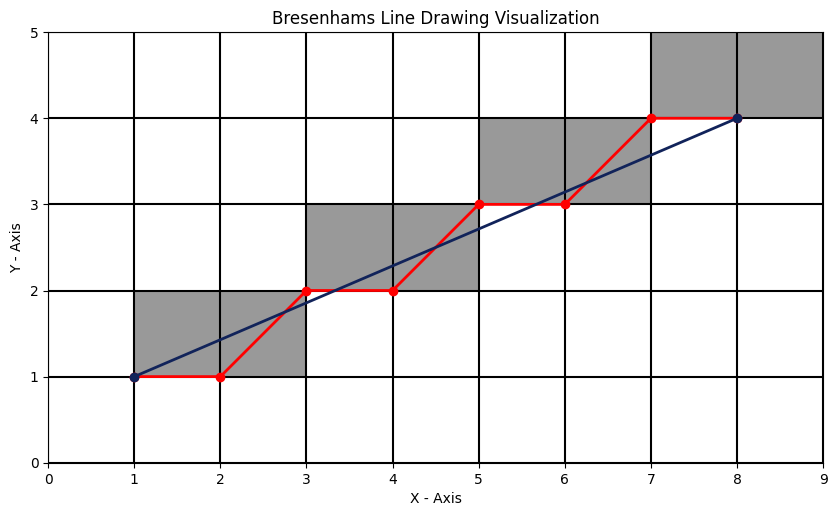

In [7]:
### Here Slope : 
m = (4 - 1) / (8 - 1);
print("Slope : ", m) ;

bresenhams_line_new(1, 1, 8, 4)

### **Bresenham's Line Drawing `m > 1` : Input : Start Point (1,1) && End Point (4,8)**

Slope :  2.3333333333333335


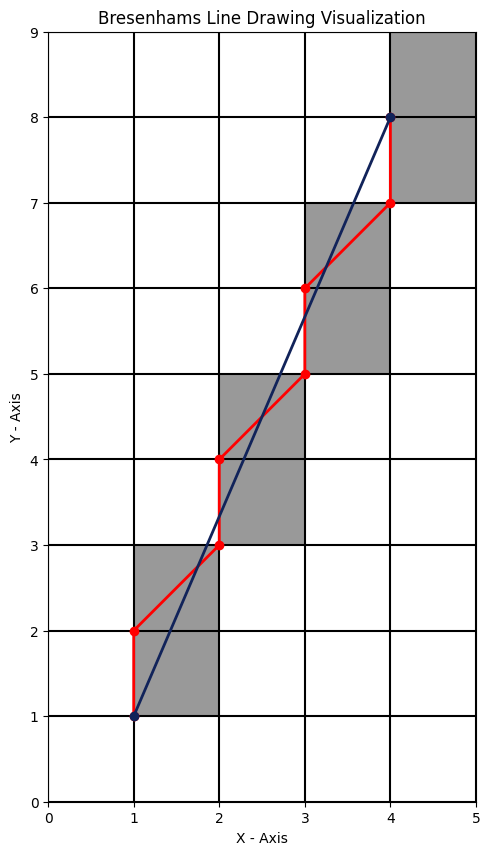

In [8]:
### Here Slope :
m = (8 - 1) / (4 - 1);
print("Slope : ", m) ;

bresenhams_line_new(1, 1, 4, 8)